# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования: обнаружить критерии определения рыночной стоимости объекта.

Ход работы:
- предобработка данных
- исследование данных

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Данные слились в одну строчку. Выведем таблицу на экран и посмотрим, какой символ разделяет значения.


In [2]:
display(data)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


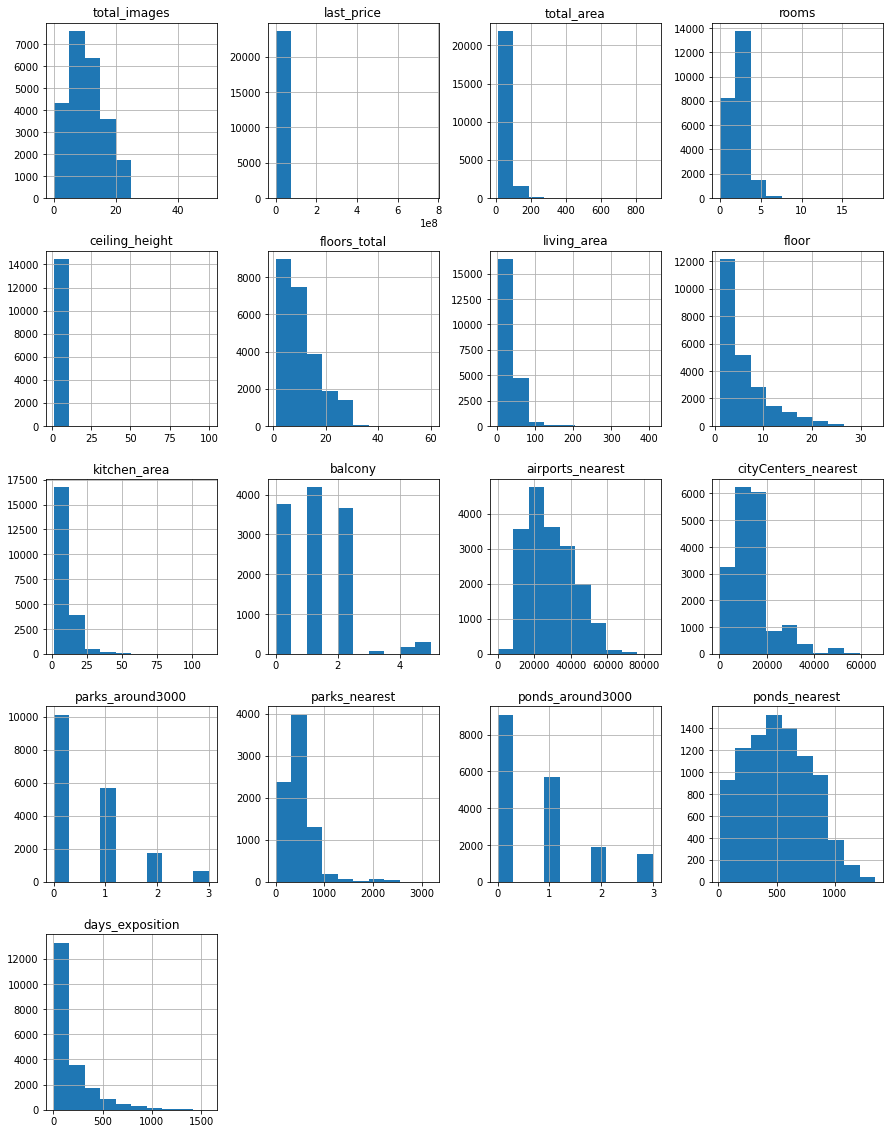

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### balcony & is_apartment

Заполним пропуски в стобцах, где это возможно. В столбцах balcony, is_apartment пропуски, очевидно, обусловлены отрицательными значениями(либо нет балконов, либо жилплощадь не является аппартаментами). Выясним для начала, какие значения встречаются в этих столбцах, затем заполним пропуски.

In [6]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [7]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [8]:
data['balcony'] = data['balcony'].fillna(value=0)
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [9]:
#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### first_day_exposition & locality_name

Два стобца имеют тип object - first_day_exposition и locality_name. Для столбца с названиями населённых пунктов такой тип соответствует, однако, первый столбец лучше привести к типу DateTime для дальнейших операций с ним. Также поменяем тип данных в колонке balcony с float на int, т.к. это целочисленная величина.

In [10]:
data['balcony'] = data['balcony'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [11]:
#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Проверим столбец locality_name на предмет неявных дубликатов и устраним их.

In [12]:
len(data['locality_name'].value_counts()) #посчитаем количество значений

364

In [13]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок', regex=False)
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа', regex=False)


In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [16]:
#заменим пропуски в названиях городов на 'населённый пункт'
data['locality_name'] = data['locality_name'].fillna('населённый пункт')

In [17]:
len(data['locality_name'].value_counts()) 


324

Количество значений немного уменьшилось, дубликаты "посёлков" устранены.
Найдём аномальные значения в столбцах, которые ещё не проверены.
Рассмотрим столбцы ponds_around3000 и parks_around3000. Предположим, что пропуск в колонках, показывающих число водоёмов и парков в радиусе 3 км, обусловлен тем, что таковых просто нет, и заменим его на ноль, а также приведем к типу int.

In [18]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['ponds_around3000'].unique() #проверим результат

array([2, 0, 3, 1])

In [19]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['parks_around3000'].unique() #проверим результат

array([1, 0, 2, 3])

#### rooms

Проанализируем столбец rooms.

In [20]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Исключим из выборки квартиры с аномально большим количеством комнат (даже если это не ошибка в данных, такие варианты - частные случаи, для анализа они помешают). Немало вариантов квартир с количеством комнат 0. Возможно, так обозначили студии. Удалим из выборки те варианты, где количество комнат 0, но квартира студией не является.

In [21]:
data = data.query('rooms != (19, 16, 15, 14, 12, 11, 10, 9, 8)')
data = data.query('rooms == (1, 2, 3, 4, 5, 6, 7) or (rooms == 0 and studio==True)')
data['rooms'].value_counts()

1    8047
2    7940
3    5814
4    1180
5     326
0     138
6     105
7      59
Name: rooms, dtype: int64

#### kitchen_area & living_area

Заполним пропуски в living_area и kitchen_area. Эти столбцы важны для анализа, но пропусков там много, удаление строк повлияет на результаты. Жилая площадь напрямую зависит от количества комнат, поэтому пропуски в living_area заполним медианным значением по каждому количеству комнат.

In [22]:
for liv in data.groupby('rooms').count():
    data.loc[(data['rooms'] == liv) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == liv), 'living_area'].median()

Площадь кухни может не зависеть ни от жилой площади, ни от количества комнат. Удалим строки с пропусками.

In [23]:
data = data.dropna(subset=['kitchen_area']).reset_index(drop=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21394 entries, 0 to 21393
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21394 non-null  int64         
 1   last_price            21394 non-null  float64       
 2   total_area            21394 non-null  float64       
 3   first_day_exposition  21394 non-null  datetime64[ns]
 4   rooms                 21394 non-null  int64         
 5   ceiling_height        13544 non-null  float64       
 6   floors_total          21355 non-null  float64       
 7   living_area           20955 non-null  float64       
 8   floor                 21394 non-null  int64         
 9   is_apartment          21394 non-null  bool          
 10  studio                21394 non-null  bool          
 11  open_plan             21394 non-null  bool          
 12  kitchen_area          21394 non-null  float64       
 13  balcony         

#### floors_total & ceiling_height

Обработаем пропуски в столбце floors_total и приведём его к типу данных int, т.к. количество этажей - целое число.

In [25]:
data['floors_total'].sort_values().unique() #аномалий нет

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 35., 36., 37., 52., 60., nan])

In [26]:
data['floors_total'].isna().sum()

39

Пропусков мало относительно всего датафрейма. Т.к. это важный параметр, удалим строки с пустым значением floors_total.

In [27]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21355 entries, 0 to 21354
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21355 non-null  int64         
 1   last_price            21355 non-null  float64       
 2   total_area            21355 non-null  float64       
 3   first_day_exposition  21355 non-null  datetime64[ns]
 4   rooms                 21355 non-null  int64         
 5   ceiling_height        13539 non-null  float64       
 6   floors_total          21355 non-null  int64         
 7   living_area           20916 non-null  float64       
 8   floor                 21355 non-null  int64         
 9   is_apartment          21355 non-null  bool          
 10  studio                21355 non-null  bool          
 11  open_plan             21355 non-null  bool          
 12  kitchen_area          21355 non-null  float64       
 13  balcony         

Проанализируем столбец ceiling_height.

In [28]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.4 ,
         2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,   2.52,
         2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,   2.6 ,
         2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,   2.68,
         2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,   2.76,
         2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,   2.84,
         2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,   2.92,
         2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   3.  ,   3.01,
         3.02,   3.03,   3.04,   3.05,   3.06,   3.07,   3.08,   3.09,
         3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,   3.16,   3.17,
         3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,   3.25,   3.26,
         3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,   3.33,   3.34,
         3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,   3.44,
         3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.51,   3.52,
      

Согласно данным, минимальной нормой потолков в жилом помещении в России является величина 2.4 м. - заполним пропуски этим значением. Максимальная высота - 10.3 м. (для двухуровневых квартир). Значения, которые выше этой величины, скорее всего искажены на 1 знак после запятой. Исправим это, кроме значений, которые после операции всё равно не будут удовлетворять условиям (14, 20, 22.6) - их также заполним минимально допустимой величиной потолка.

In [29]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.4)
old_value = [24, 25, 26, 27, 27.5, 32, 100, 14, 20, 22.6]
new_value = [2.4, 2.5, 2.6, 2.7, 2.75, 3.2, 10.0, 2.4, 2.4, 2.4]
data['ceiling_height'] = data['ceiling_height'].replace(old_value, new_value)
data.reset_index(inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21355 entries, 0 to 21354
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 21355 non-null  int64         
 1   total_images          21355 non-null  int64         
 2   last_price            21355 non-null  float64       
 3   total_area            21355 non-null  float64       
 4   first_day_exposition  21355 non-null  datetime64[ns]
 5   rooms                 21355 non-null  int64         
 6   ceiling_height        21355 non-null  float64       
 7   floors_total          21355 non-null  int64         
 8   living_area           20916 non-null  float64       
 9   floor                 21355 non-null  int64         
 10  is_apartment          21355 non-null  bool          
 11  studio                21355 non-null  bool          
 12  open_plan             21355 non-null  bool          
 13  kitchen_area    

#### cityCenters_nearest & days_exposition

In [31]:
data['cityCenters_nearest'].sort_values().unique() 

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

Аномальных значений нет, удалим NaN, т.к. логической замены нет.

In [32]:
data = data.dropna(subset=['cityCenters_nearest']).reset_index(drop=True)
data['cityCenters_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65764., 65952., 65968.])

In [33]:
#рассмотрим следующий столбец
data['days_exposition'].sort_values().unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.553e+03, 1.572e+03,
             nan])

В столбце days_exposition аномальных значений нет. Заменим пропуски числом 0, считая за нуль сам факт публикации, остальные значения приведём к типу int, т.к. дни измеряются в целых числах.

In [34]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554 entries, 0 to 16553
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 16554 non-null  int64         
 1   total_images          16554 non-null  int64         
 2   last_price            16554 non-null  float64       
 3   total_area            16554 non-null  float64       
 4   first_day_exposition  16554 non-null  datetime64[ns]
 5   rooms                 16554 non-null  int64         
 6   ceiling_height        16554 non-null  float64       
 7   floors_total          16554 non-null  int64         
 8   living_area           16266 non-null  float64       
 9   floor                 16554 non-null  int64         
 10  is_apartment          16554 non-null  bool          
 11  studio                16554 non-null  bool          
 12  open_plan             16554 non-null  bool          
 13  kitchen_area    

Расстояние до водоёмов, парков и аэропорта пока оставим без дальнейших изменений.
Вывод: данные искажены множеством пропусков, следовало бы отправить их на доработку и выяснить истинные причины в пропусках, потому что после предобработки потеряна большая часть данных.

In [36]:
#проверка на дубликаты
data['last_price'] = data['last_price'].round(0).astype(int)

In [37]:
data.duplicated().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы, необходимые для анализа.

In [38]:
#Стоимость одного квадратного метра
data['price_1m2'] = data['last_price']/data['total_area']
#день недели публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month             
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year     
#тип этажа
def typing(row):
    floor = row['floor']
    total = row['floors_total']

    if floor == 1:
        return 'первый'

    if floor == total:
        return 'последний'

    return 'другой'
data['floor_type'] = data.apply(typing, axis=1)
#расстояние до центра города в километрах, округлённое до целого
data['cityCenter_km'] = data['cityCenters_nearest']/1000
data['cityCenter_km'] = data['cityCenter_km'].round(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554 entries, 0 to 16553
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 16554 non-null  int64         
 1   total_images          16554 non-null  int64         
 2   last_price            16554 non-null  int64         
 3   total_area            16554 non-null  float64       
 4   first_day_exposition  16554 non-null  datetime64[ns]
 5   rooms                 16554 non-null  int64         
 6   ceiling_height        16554 non-null  float64       
 7   floors_total          16554 non-null  int64         
 8   living_area           16266 non-null  float64       
 9   floor                 16554 non-null  int64         
 10  is_apartment          16554 non-null  bool          
 11  studio                16554 non-null  bool          
 12  open_plan             16554 non-null  bool          
 13  kitchen_area    

### Проведите исследовательский анализ данных

#### Изучим параметры объектов и построим гистограммы.

In [39]:
#общая площадь
data['total_area'].describe()

count    16554.000000
mean        63.124182
std         36.234693
min         14.000000
25%         41.800000
50%         54.500000
75%         73.000000
max        631.200000
Name: total_area, dtype: float64

<AxesSubplot:>

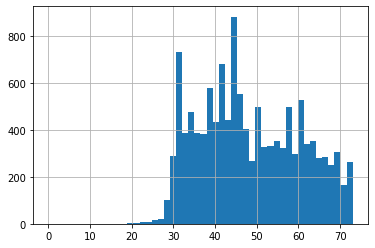

In [40]:
#возьмём за границу величину третьего квартиля.
data['total_area'].hist(bins=50, range=(0, 73), grid=True)

График выглядит нормально, наибольшее количество квартир имеют площадь 44-45 м2.

In [41]:
#жилая площадь
data['living_area'].describe()

count    16266.000000
mean        35.966739
std         22.600444
min          2.000000
25%         19.300000
50%         31.000000
75%         43.500000
max        347.500000
Name: living_area, dtype: float64

<AxesSubplot:>

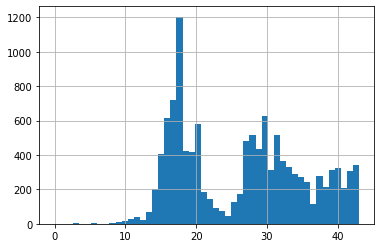

In [42]:
data['living_area'].hist(bins=50, range= (0, 43), grid=True)

Наиболее часто встречающиеся показатели жилой площади квартир - около 18м2 и 30м2. Провал в районе значений 24-25 может быть обоснован тем, что типовая застройка не подразумевает таких размеров жилой площади.

In [43]:
#площадь кухни
data['kitchen_area'].describe()

count    16554.000000
mean        10.913780
std          6.228216
min          1.300000
25%          7.100000
50%          9.655000
75%         12.177500
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

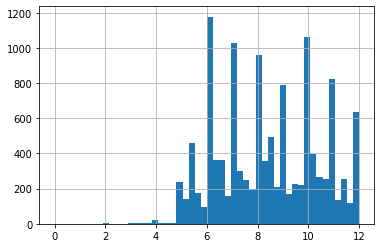

In [44]:
data['kitchen_area'].hist(bins=50, range=(0, 12), grid=True)

Чаще всего в выборке встречаются кухни с площадью 6, 8, 10 м2. Выбросы опять же обусловлены типовой застройкой с фиксированной площадью кухни.

In [45]:
#цена объекта
data['last_price'].describe()

count    1.655400e+04
mean     7.446515e+06
std      1.010992e+07
min      1.219000e+04
25%      4.050000e+06
50%      5.300000e+06
75%      7.650000e+06
max      4.013000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

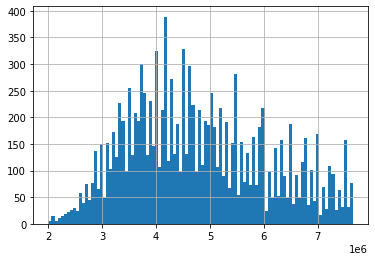

In [46]:
data['last_price'].hist(bins=100, range=(0.02e+8, 7.650000e+06), grid=True)

Чаще всего в выборке встречаются квартиры стоимостью около 4.2 млн. руб.

<AxesSubplot:>

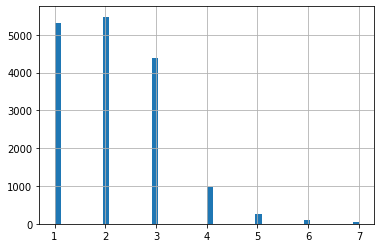

In [47]:
#количество комнат
data['rooms'].hist(bins=50, grid=True)

1, 2 и 3-хкомнатные квартиры  представляют большинство квартир на рынке.

In [48]:
#высота потолков
data['ceiling_height'].describe()

count    16554.000000
mean         2.627831
std          0.298505
min          1.000000
25%          2.400000
50%          2.530000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

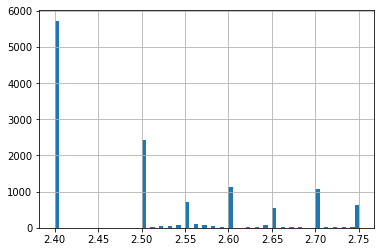

In [49]:
data['ceiling_height'].hist(bins=70, range=(2.4, 2.75), grid=True)

В целом, потолки выше 2.75 метров встречаются редко. Мы заменили странные значения вроде 1м на минимально допустимую высоту потолка, потому что удалить данные с такими значениями - потеря большого количества информации. Лучше разобраться, чем могло быть вызвано такое количество аномалий.

In [50]:
#этаж квартиры
data['floor'].describe()

count    16554.000000
mean         6.095324
std          4.886234
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

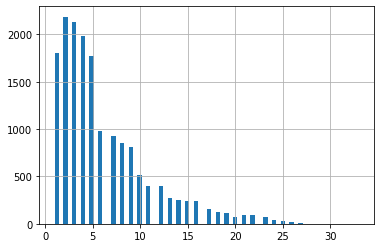

In [51]:
data['floor'].hist(bins=70, range=(1, 33), grid=True)

Этажи с первого по пятый встречаются чаще, потому что большое количество зданий не превышает высоты в 5 этажей, также в зданиях выше тоже есть этажи с 1 по 5.

<AxesSubplot:>

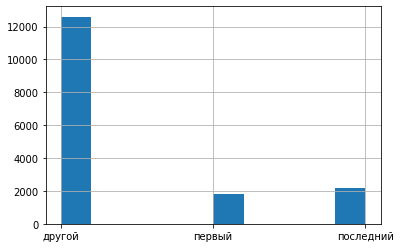

In [52]:
#тип этажа квартиры
data['floor_type'].hist(bins=10, grid=True)

В любом  многоэтажном здании этажей, отличных от первого и последнего, будет больше.

In [53]:
data['floors_total'].describe()

count    16554.000000
mean        11.093331
std          6.483391
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

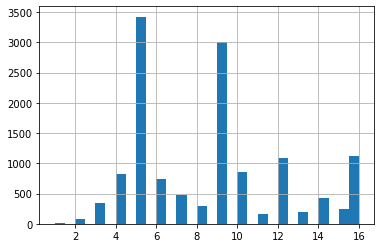

In [54]:
data['floors_total'].hist(bins=30, range=(1, 16), grid=True)

Пятиэтажки и девятиэтажки - самые распространённые типы жилых зданий.

In [55]:
#расстояние до центра города в метрах
data['cityCenters_nearest'].describe()

count    16554.000000
mean     14228.294430
std       8650.376432
min        181.000000
25%       9289.250000
50%      13100.000000
75%      16269.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

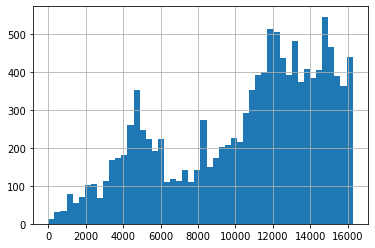

In [56]:
data['cityCenters_nearest'].hist(bins=50, range=(0, 16269.5), grid=True);

Большая часть квартир расположена на расстоянии от 10км до 16км от центра города, что неблизко. Однако, немалое количество квартир расположено на расстоянии 4-5км от центра.

<AxesSubplot:>

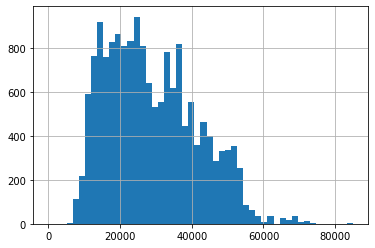

In [57]:
#Расстояние до аэропорта.
data['airports_nearest'].hist(bins=50, grid=True)

В среднем расстояние до аэропорта колеблется от 15 до 38 км.

<AxesSubplot:>

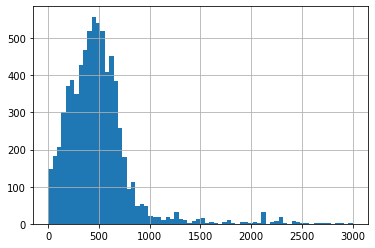

In [58]:
#расстояние до ближайшего парка (в районе 3км)
data['parks_nearest'].hist(bins=70, range=(0, 3000), grid=True)

400-500 метров до ближайшего парка - очень хороший показатель.

<AxesSubplot:>

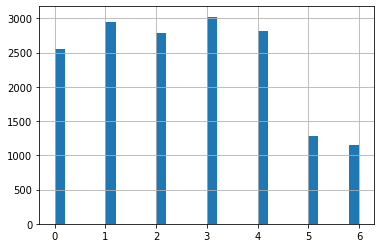

In [59]:
#день и месяц публикации объявления
data['weekday'].hist(bins=30, grid=True)

<AxesSubplot:>

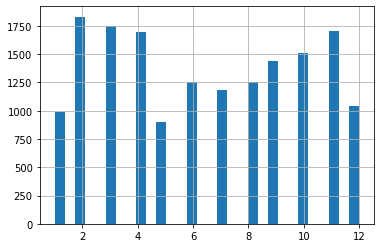

In [60]:
data['month'].hist(bins=30, grid=True)

По будням чаще выкладывают объявления. Также рост активности наблюдается в осенне-зимний период, по сравнению с весенне-летним (за исключением периода новогодних праздников).

#### Скорость продажи квартир

<AxesSubplot:>

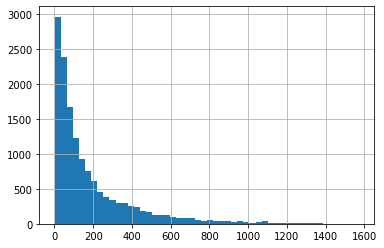

In [61]:
#При подсчётах отбросим пропуски.
data['days_exposition'].hist(bins=50, range=(1, data['days_exposition'].max()), grid=True)

In [62]:
print(data.loc[data['days_exposition']>1, 'days_exposition'].mean())
print(data.loc[data['days_exposition']>1, 'days_exposition'].median())

185.43654928110024
100.0


<AxesSubplot:>

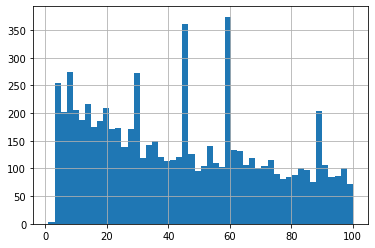

In [63]:
data['days_exposition'].hist(bins=50, range=(1, 100), grid=True)

<AxesSubplot:>

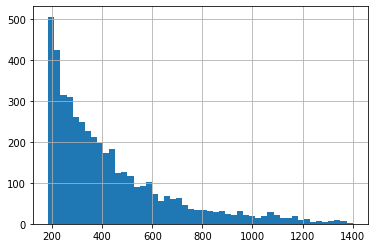

In [64]:
data['days_exposition'].hist(bins=50, range=(185, 1400), grid=True)

Как правило, продажи занимают по времени чуть больше 3-х месяцев. Медианное значение почти в 2 раза меньше среднего, хоть мы исключили из выборки добавленные значения. При построении графика в промежутке до медианного значения видно, что есть аномально быстрые продажи за 5-7 дней, однако остальные пики в 30, 45 и 60 дней назвать очень быстрыми нельзя. На графике с долгими продажами  видно, что их процент не особо велик, но тем не менее существуют квартиры, продающиеся год, два; самые долгие продажи достигают 4-х лет.

#### Факторы влияния на общую стоимость объекта

Корреляция =  0.6869120116448791


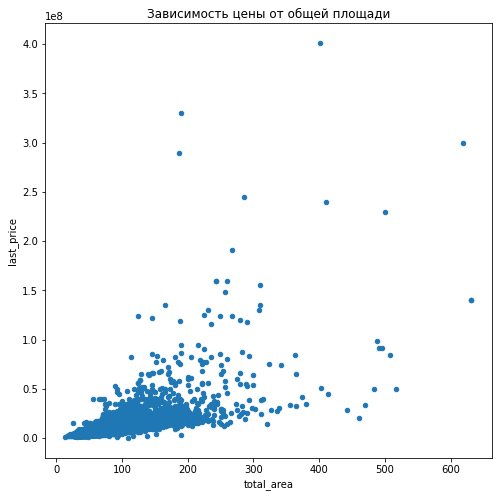

In [67]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(8,8),\
          title='Зависимость цены от общей площади');
print('Корреляция = ', data['total_area'].corr(data['last_price']))

В целом общая площадь квартиры напрямую влияет на её стоимость, корреляция достаточно высокая. Скачки в графике в пределах близких по значению величин площади зависят от дополнительных факторов, влияющих на общую стоимость (расположение по отношению к объектам инфраструктуры, год постройки здания и т.д.)

Корреляция =  0.596891098589576


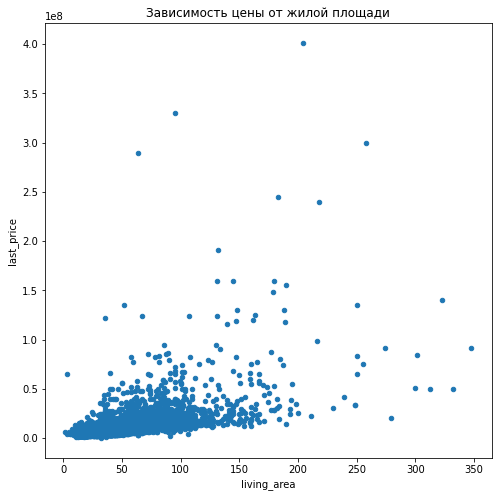

In [68]:
#жилая площадь
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(8,8),\
         title='Зависимость цены от жилой площади');
print('Корреляция = ', data['living_area'].corr(data['last_price']))

Здесь ситуация схожа с зависимостью от общей площади квартиры, т.к. эти величины сами по себе зависят друг от друга, но корреляция уже поменьше.

Корреляция =  0.504901289320231


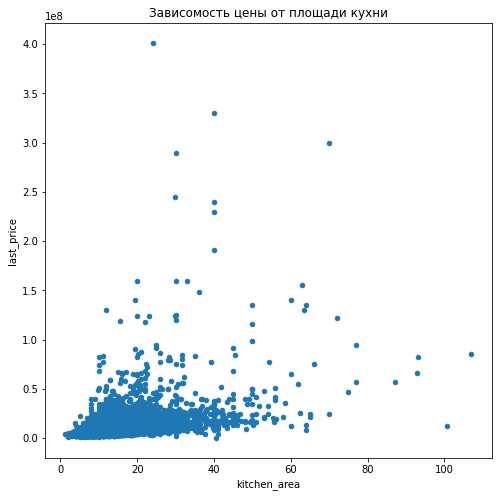

In [69]:
#площадь кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8,8),\
         title='Зависомость цены от площади кухни');
print('Корреляция = ', data['kitchen_area'].corr(data['last_price']))

Площадь кухни уже меньше влияет на стоимость, наблюдается больше выбросов. Но зависимость всё равно наблюдается, хотя она связана скорее с общим увеличением площади нестандартных квартир.

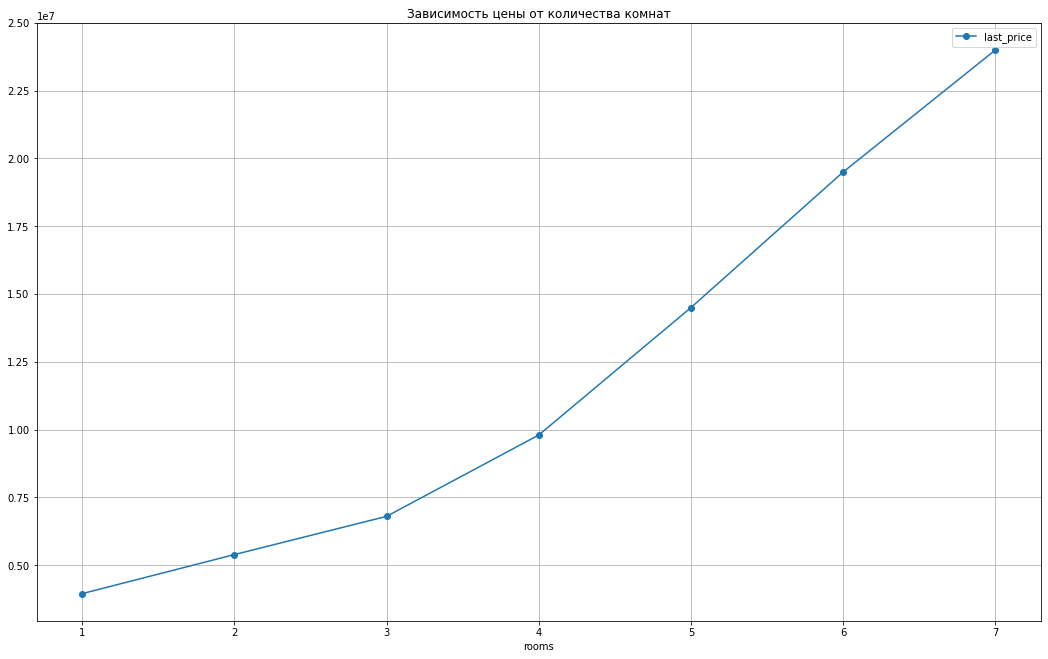

In [70]:
#количество комнат
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(18, 11), title='Зависимость цены от количества комнат')
);

Чем больше комнат, тем выше стоимость квартиры.

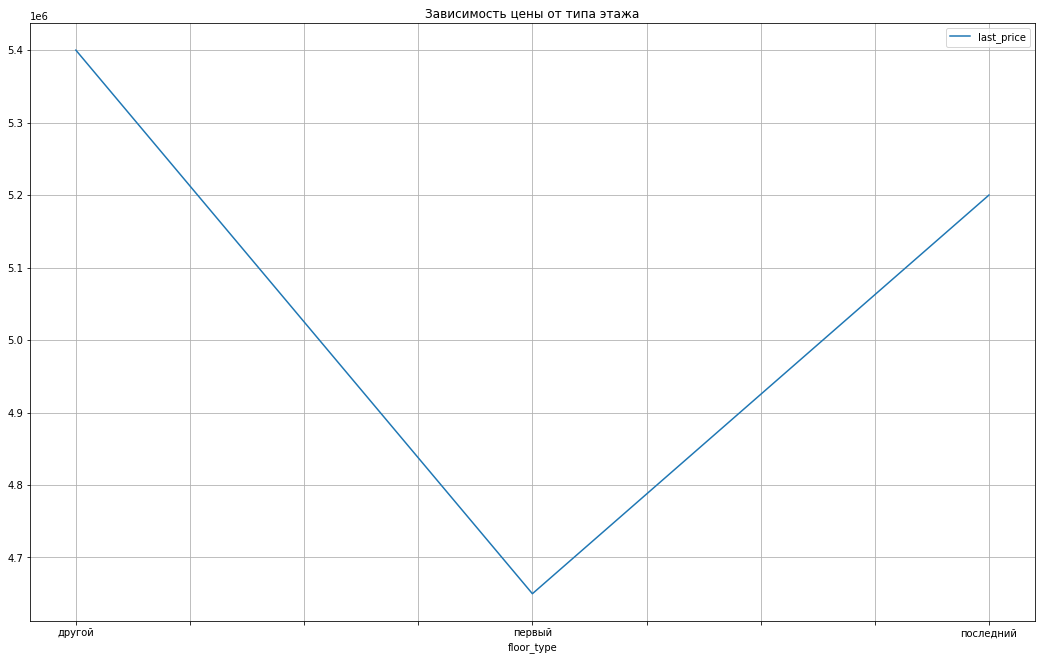

In [71]:
#тип этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18, 11), title='Зависимость цены от типа этажа')
);

Квартиры на первом этаже сильно проигрывают в стоимости квартирам на последнем и других этажах. Последний этаж немного уступает другим этажам.

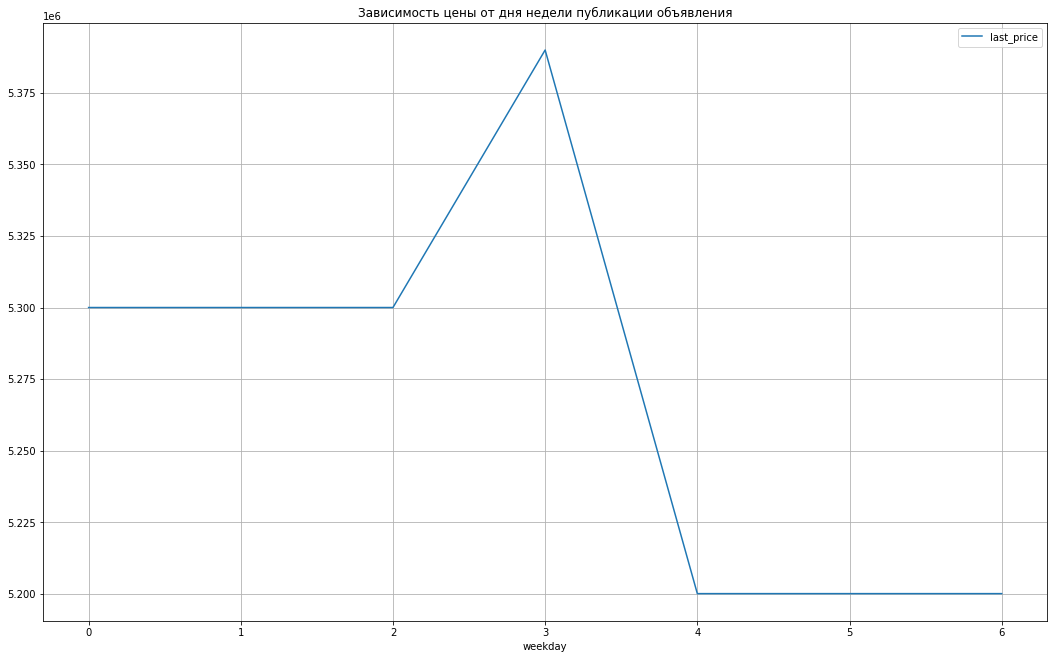

In [72]:
#день недели
(
    data.pivot_table(index='weekday', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18, 11), title='Зависимость цены от дня недели публикации объявления')
);

Цена на квартиры, выложенные в будни, выше, пик цен в четверг, резкий спад к пятнице. Возможно, это связано с работой агенств по недвижимости.

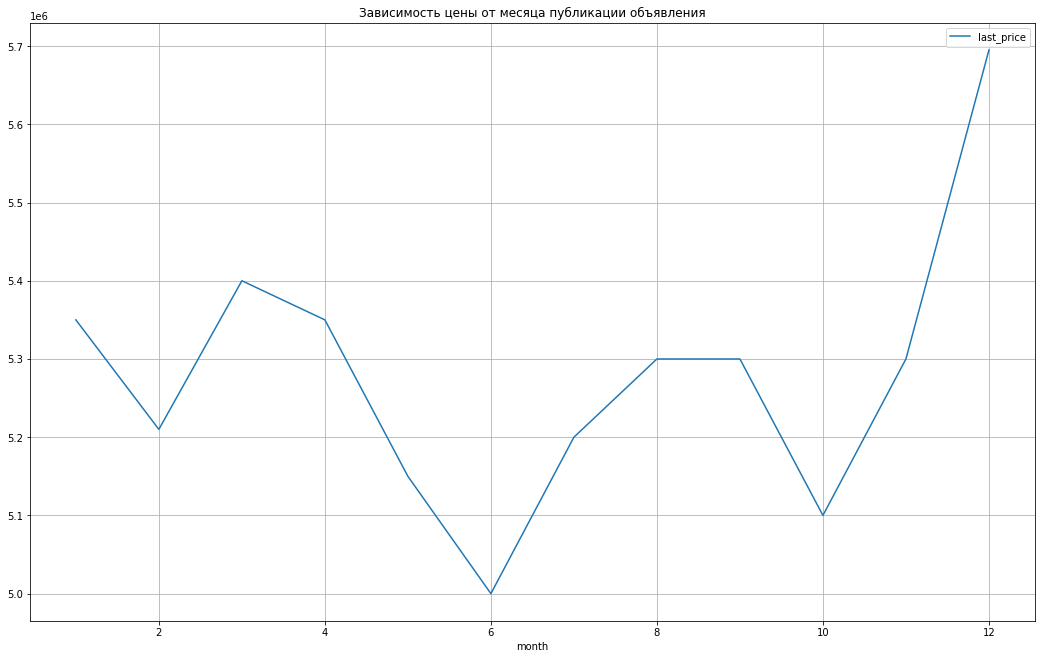

In [73]:
#месяц
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18, 11), title='Зависимость цены от месяца публикации объявления')
);

Самый пик цен наблюдается под Новый год, самые низкие цены на квартиры в середине лета.

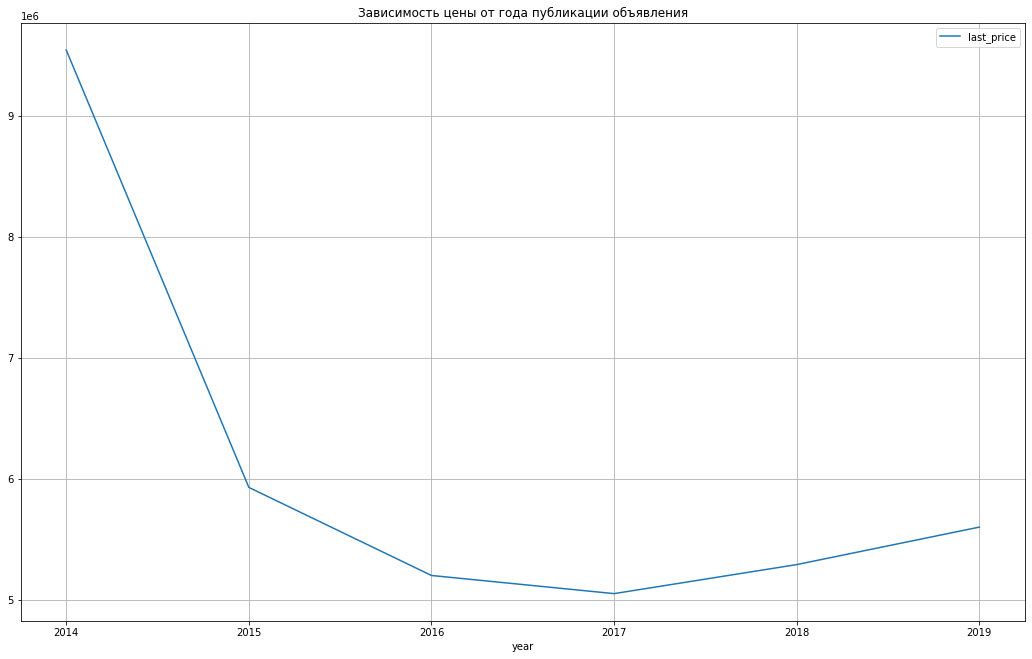

In [74]:
#год
(
    data.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(18, 11), title='Зависимость цены от года публикации объявления')
);

В период с 2014 по 2015 год наблюдался резкий спад цен на жильё, что связано с экономическим кризисом 2014-го года. С 2017 начинается плавный рост цен. 

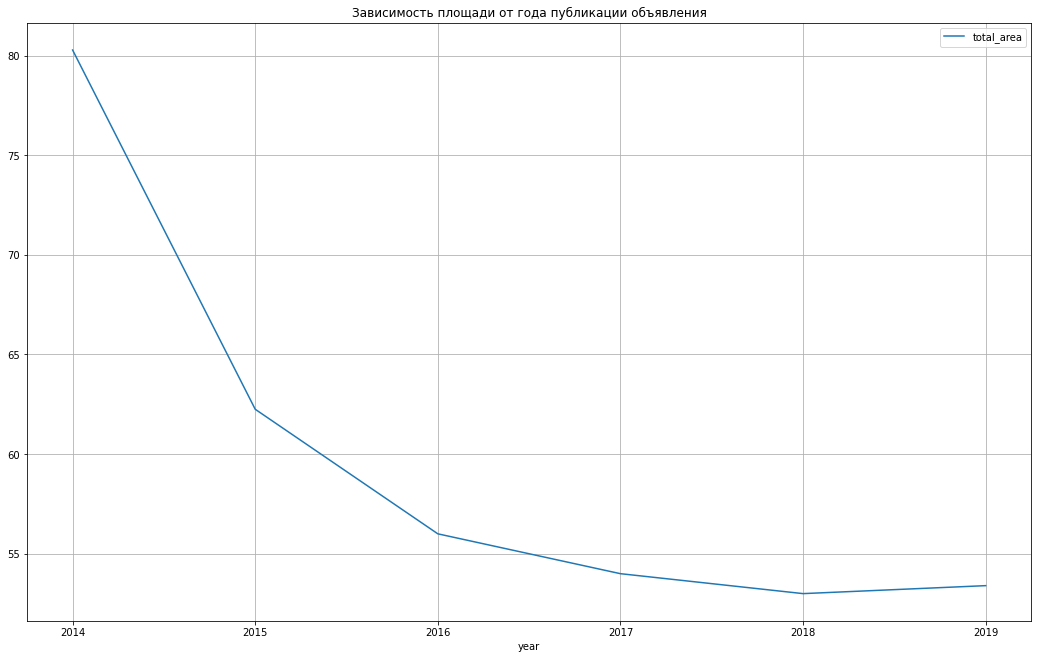

In [80]:
#год
(
    data.pivot_table(index='year', values='total_area', aggfunc='median')
    .plot(grid=True, figsize=(18, 11), title='Зависимость площади от года публикации объявления')
);

#### Зависимость цены от населённого пункта

In [75]:
#сумма всех цен
price_sum = data.pivot_table(index='locality_name', values='last_price', aggfunc='sum')
#сумма всех площадей
area_sum = data.pivot_table(index='locality_name', values='total_area', aggfunc='sum')
#подсчёт количества объявлений
tens_count = data['locality_name'].value_counts()
#объединение таблиц
tens_big = price_sum.join(area_sum)
tens_big = tens_big.join(tens_count)
#переименование столбцов
tens_big.columns = ['price_sum', 'area_sum', 'tens_count']
#рассчёт стоимости 1км
tens_big['price_1m2'] = tens_big['price_sum']/tens_big['area_sum']
tens_big.sort_values(by='tens_count', ascending=False).head(10)

,price_sum,area_sum,tens_count,price_1m2
locality_name,,,,
Санкт-Петербург,112385903734,917151.68,14237,122537.968566
посёлок Шушары,1633317299,21415.16,396,76269.208309
Пушкин,2191564264,20873.39,337,104993.212123
Колпино,1236999721,16807.15,320,73599.612129
посёлок Парголово,1301965459,14798.44,289,87979.912680
Петергоф,834762000,9882.00,190,84472.981178
Сестрорецк,1040167140,10413.26,168,99888.713045
Красное Село,636756000,9158.20,165,69528.509969
Ломоносов,457480000,6355.80,124,71978.350483


In [76]:
#выбор 10 городов с наибольшим количеством объявлений
tens_big = tens_big.loc[tens_big['tens_count']>=89]
tens_big.sort_values(by='price_1m2', ascending=False)

,price_sum,area_sum,tens_count,price_1m2
locality_name,,,,
Санкт-Петербург,112385903734,917151.68,14237,122537.968566
Пушкин,2191564264,20873.39,337,104993.212123
Сестрорецк,1040167140,10413.26,168,99888.713045
посёлок Парголово,1301965459,14798.44,289,87979.912680
Петергоф,834762000,9882.00,190,84472.981178
Кронштадт,367016999,4590.30,89,79954.904690
посёлок Шушары,1633317299,21415.16,396,76269.208309
Колпино,1236999721,16807.15,320,73599.612129
Ломоносов,457480000,6355.80,124,71978.350483


Самая высокая цена за квадратный метр - в Санкт-Петербурге (122538 руб), самая низкая - в Красном Селе (69528 руб).

#### Средняя цена за километр

In [77]:
data['price_1km'] = data['last_price']/data['cityCenter_km']
SPB = data.loc[data['locality_name']=='Санкт-Петербург']
display(SPB)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month,year,floor_type,cityCenter_km,price_1km
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,...,2,755.0,0,120370.370370,3,3,2019,другой,16,8.125000e+05
2,2,10,5196000,56.00,2015-08-20,2,2.40,5,34.3,4,...,2,574.0,558,92785.714286,3,8,2015,другой,14,3.711429e+05
3,3,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,...,1,48.0,121,100000.000000,1,6,2018,другой,8,1.250000e+06
5,6,5,7915000,71.60,2019-04-18,2,2.40,24,NaN,22,...,0,NaN,0,110544.692737,3,4,2019,другой,12,6.595833e+05
6,8,18,5400000,61.00,2017-02-26,3,2.50,9,43.6,7,...,0,NaN,289,88524.590164,6,2,2017,другой,15,3.600000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16548,21346,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,...,2,652.0,29,100566.572238,2,2,2018,другой,16,2.218750e+05
16549,21347,3,5500000,52.00,2018-07-19,2,2.40,5,31.0,2,...,0,NaN,15,105769.230769,3,7,2018,другой,6,9.166667e+05
16550,21348,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,...,1,806.0,519,129903.978052,3,10,2016,другой,4,2.367500e+06
16552,21351,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,...,3,381.0,0,72490.845228,1,3,2017,другой,4,2.425000e+06


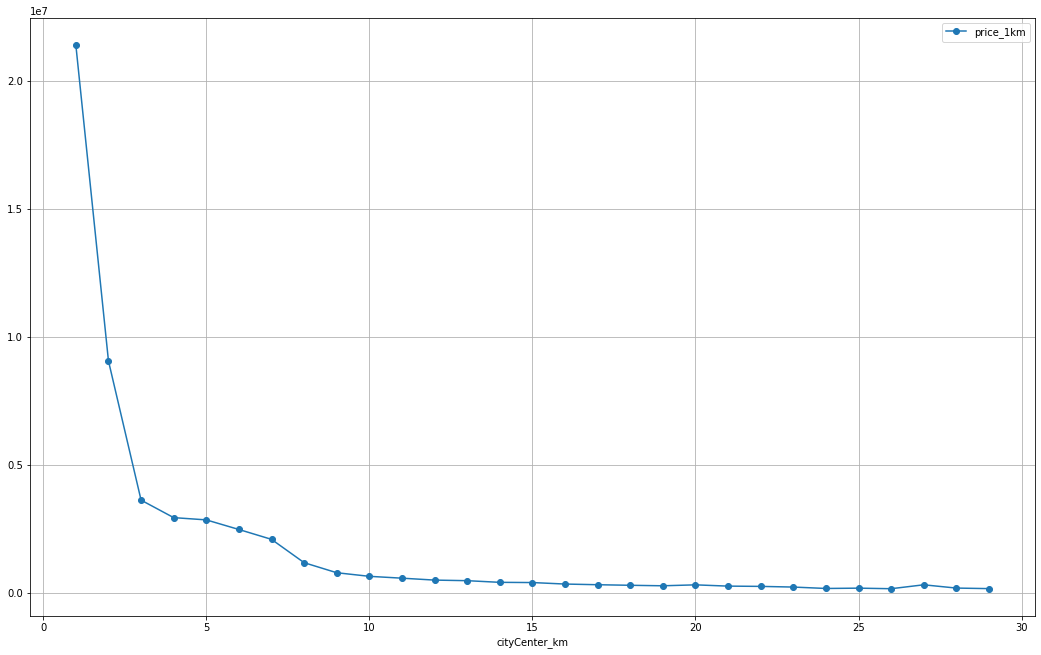

In [78]:
(
    SPB.pivot_table(index='cityCenter_km', values='price_1km', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(18, 11))
);

Цена 1 километра резко возрастает при значении от3 км и меньше, при удалении от центра на 10 и более км идёт плавный спад цены.

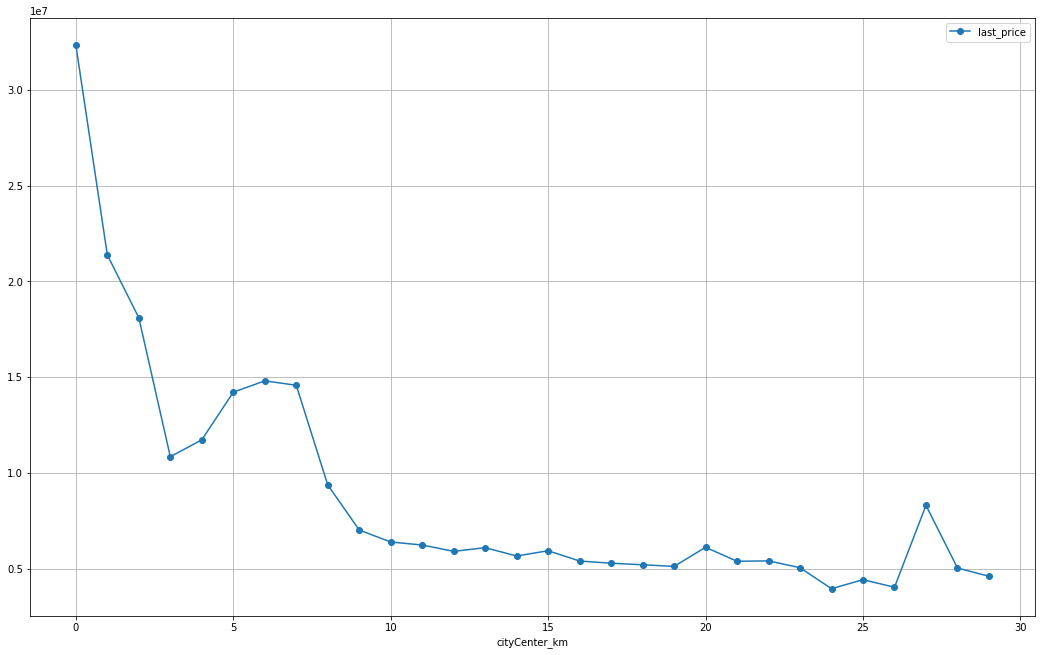

In [79]:
(
    SPB.pivot_table(index='cityCenter_km', values='last_price', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(18, 11))
);

### Общий вывод

Для выполнения проекта были выполнены следующие шаги:
1. Выполнена предобработка данных, заполнены пропуски в данных
2. Добавлены необходимые величины для расчётов
3. Построены гистограммы и графики зависимости величин

На основании этого были сделаны следующие выводы:
1. Наибольшее влияние на конечную стоимость квартиры оказывает её общая площадь (корреляция почти 0.7); Чуть меньше влияет метраж жилой площади (корреляция 0.6) и кухни (корреляция 0.5)
2. Наблюдается прямая зависимость от увеличения количества комнат, а также этажи, отличные от первого и последнего, имеют большее преимущество, но всё же первый этаж сильно уступает остальным в цене. Удалённость от центра города также  влияет на стоимость - чем даьше, тем дешевле, однако, в основном утверждение верно для удалённости более 10 км, в черте города могут наблюдаться скачки в зависимости от дополнительных опций (наличие инфраструктуры, типа здания, расстояние до аэропорта, парков  и т.д.)
3. Имеется зависимость между днём недели, месяцем, годом публикации и ценой квартиры:
   * Цена выше в дни с понедельника по четверг;
   * Самый пик цен наблюдается под Новый год, самые низкие цены на квартиры в середине лета.
   *В период с 2014 по 2015 год наблюдался резкий спад цен на жильё, что связано с экономическим кризисом 2014-го года. С 2017 начинается плавный рост цен.
4. В среднем продажа квартиры занимают около 3-х месяцев. Если это нестандартная квартира с высокой ценой, продажи могут занимать срок от 3-х лет и больше.

Выводы:
1. Для продавца можно составить список критериев, когда лучше всего запускать продажу, а также какие дополнительные опции квартиры нужно указать, чтобы поднять её в цене по сравнению с конкурентами.
2. Настроить напоминания, когда нужно пересмотреть объявление, например, если оно долго висит без продвижения.
3. Сделать карту города с выделенными областями по ценам.
4. Сделать обязательными для заполнения важные графы в объявлении для более полной картины.
5. Добавить платные опции для продвижения объявления.